In [1]:
using BenchmarkTools
using Plots

include("parallelized_DLA.jl")

Main.DLA_parallel

# [OLD] Parallel DLA implementation 

## Initialize constants

In [9]:
birth_radius = 12  # larger starting radius minimizes halo effect
num_walkers = 80
num_steps = 1000
desired_cluster_size = 2500
;

In [10]:
@time cluster = DLA_parallel.parallelized_DLA(num_walkers, num_steps, desired_cluster_size, birth_radius)

 The current size of the cluster is 2513. 634.063503 seconds (6.03 G allocations: 448.948 GiB, 10.30% gc time)


2513-element Vector{Any}:
 [0, 0]
 [0, 1]
 [0, 2]
 [1, 0]
 [0, 3]
 [1, -1]
 [0, 4]
 [1, 4]
 [-1, 2]
 [1, 5]
 ⋮
 [31, -48]
 [-3, 63]
 [-24, 59]
 [42, -33]
 [-2, -64]
 [-23, -53]
 [-57, -3]
 [-13, 65]
 [57, 23]

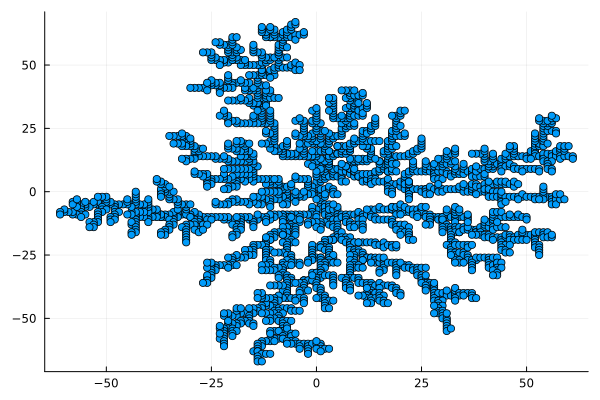

In [12]:
fig = scatter()
scatter!(fig, ([v[1] for v in cluster], [v[2] for v in cluster]), label="")

# r = birth_radius
# θ = range(-π, π, 1000)
# plot!(fig, (r * cos.(θ), r * sin.(θ)), color="black", label="")

# Appendix A: Circle generation

### Demonstration

In [9]:
r = 16

# Discrete circle
circle_points = Utils.get_circle_points(r)

# Continuous circle
θ = range(-π, π, 1000)
xpoints = r * cos.(θ)
ypoints = r * sin.(θ)
;

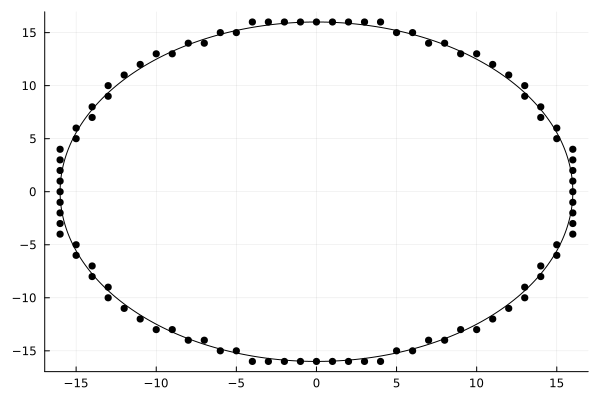

In [10]:
s = scatter()
for (px, py) in circle_points
    scatter!(s, (px, py), color="black", label="")
end
plot!(s, (xpoints, ypoints), color = "black", label="")

### Benchmarking

In [16]:
r = 1_000_000
@btime Utils.get_circle_points($r)
;

  24.523 ns (1 allocation: 16 bytes)
